# Library Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data

In [3]:
supermarketsales_df = pd.read_csv('/content/supermarket_sales - Sheet1(1).csv')

# Assesing Data

In [4]:
supermarketsales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
supermarketsales_df.info() # check column, type and numbers of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
supermarketsales_df.duplicated().sum() # check duplicate data

0

In [7]:
supermarketsales_df.isna().sum() # check missing values on all column

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Cleaning Data

In [8]:
datetime_columns = ["Date"]

for column in datetime_columns:
  supermarketsales_df[column] = pd.to_datetime(supermarketsales_df[column]) # change type of date column to datetime

# Exploratory Data Analyst & Visualization

In [9]:
supermarketsales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [10]:
supermarketsales_df.corr().round(2)

<ipython-input-10-675519c59eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  supermarketsales_df.corr().round(2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


## EDA by Branch

In [13]:
sellbybranch_df = supermarketsales_df.groupby(by="Branch").agg({
  "Branch": "count"
}).rename(columns={"Branch": "Branch Count"}).reset_index()
sellbybranch_df.head() # see how many sales are made by the branch

,Branch,Branch Count
0,A,340
1,B,332
2,C,328


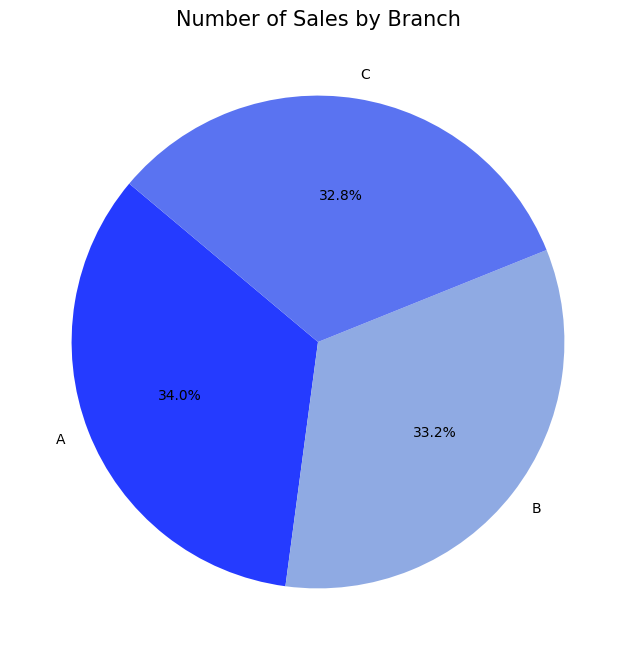

In [43]:
branch_counts = sellbybranch_df.groupby('Branch')['Branch Count'].sum()
colors = ['#253BFF', '#8FAAE3', "#5A73F1"]

plt.figure(figsize=(8, 8))
plt.pie(branch_counts, labels=branch_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Sales by Branch', fontsize=15)
plt.show()

Judging from the results of the table and visualization, it can be seen that branch A has more sales than other branches.

In [44]:
totalsellquantitybybranch_df = supermarketsales_df.groupby(by="Branch").agg({
  "gross income": "sum",
  "Quantity": "sum",
  "Rating": "sum"
}).reset_index()
totalsellquantitybybranch_df.head() # see the total gross income, sales quantity and branch rating

,Branch,gross income,Quantity,Rating
0,A,5057.1605,1859,2389.2
1,B,5057.0320,1820,2263.6
2,C,5265.1765,1831,2319.9


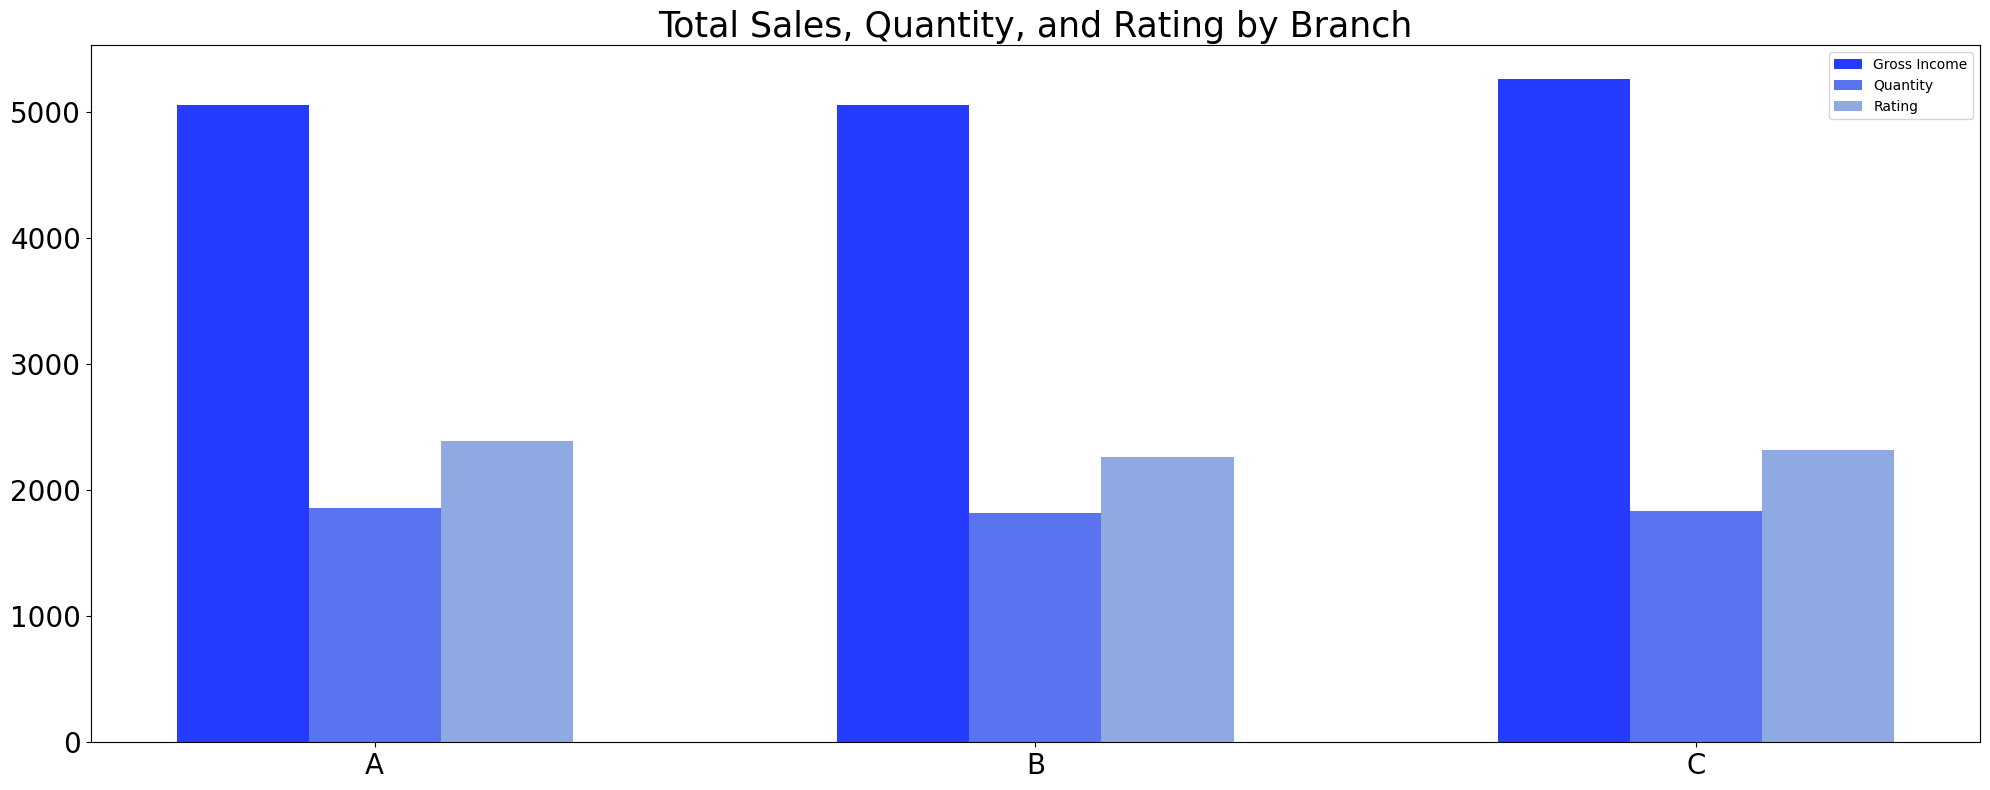

In [16]:
branch = totalsellquantitybybranch_df["Branch"]
gross_income = totalsellquantitybybranch_df["gross income"]
quantity = totalsellquantitybybranch_df["Quantity"]
rating = totalsellquantitybybranch_df["Rating"]

bar_width = 0.2
index = np.arange(len(branch))

plt.figure(figsize=(20, 8))
plt.bar(index, gross_income, bar_width, label="Gross Income", color="#253BFF", align="center")
plt.bar(index + bar_width, quantity, bar_width, label="Quantity", color="#5A73F1", align="center")
plt.bar(index + 2 * bar_width, rating, bar_width, label="Rating", color="#8FAAE3", align="center")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Total Sales, Quantity, and Rating by Branch", loc="center", fontsize=25)
plt.xticks(index + bar_width, branch)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.legend()
plt.tight_layout()
plt.show()

Judging from the results of the table and visualization, it can be seen that branch A has the highest sales quantity and rating compared to other branches, but branch C has more gross income than other branches.

In [17]:
paymentbybranch_df = supermarketsales_df.groupby(by="Branch")["Payment"].value_counts().unstack(fill_value=0)
paymentbybranch_df.reset_index(inplace=True)
paymentbybranch_df.columns = ['Branch', 'Cash', 'Credit card', 'Ewallet']
paymentbybranch_df.head() #see the payment method preferences made by customers at existing branches

,Branch,Cash,Credit card,Ewallet
0,A,110,104,126
1,B,110,109,113
2,C,124,98,106


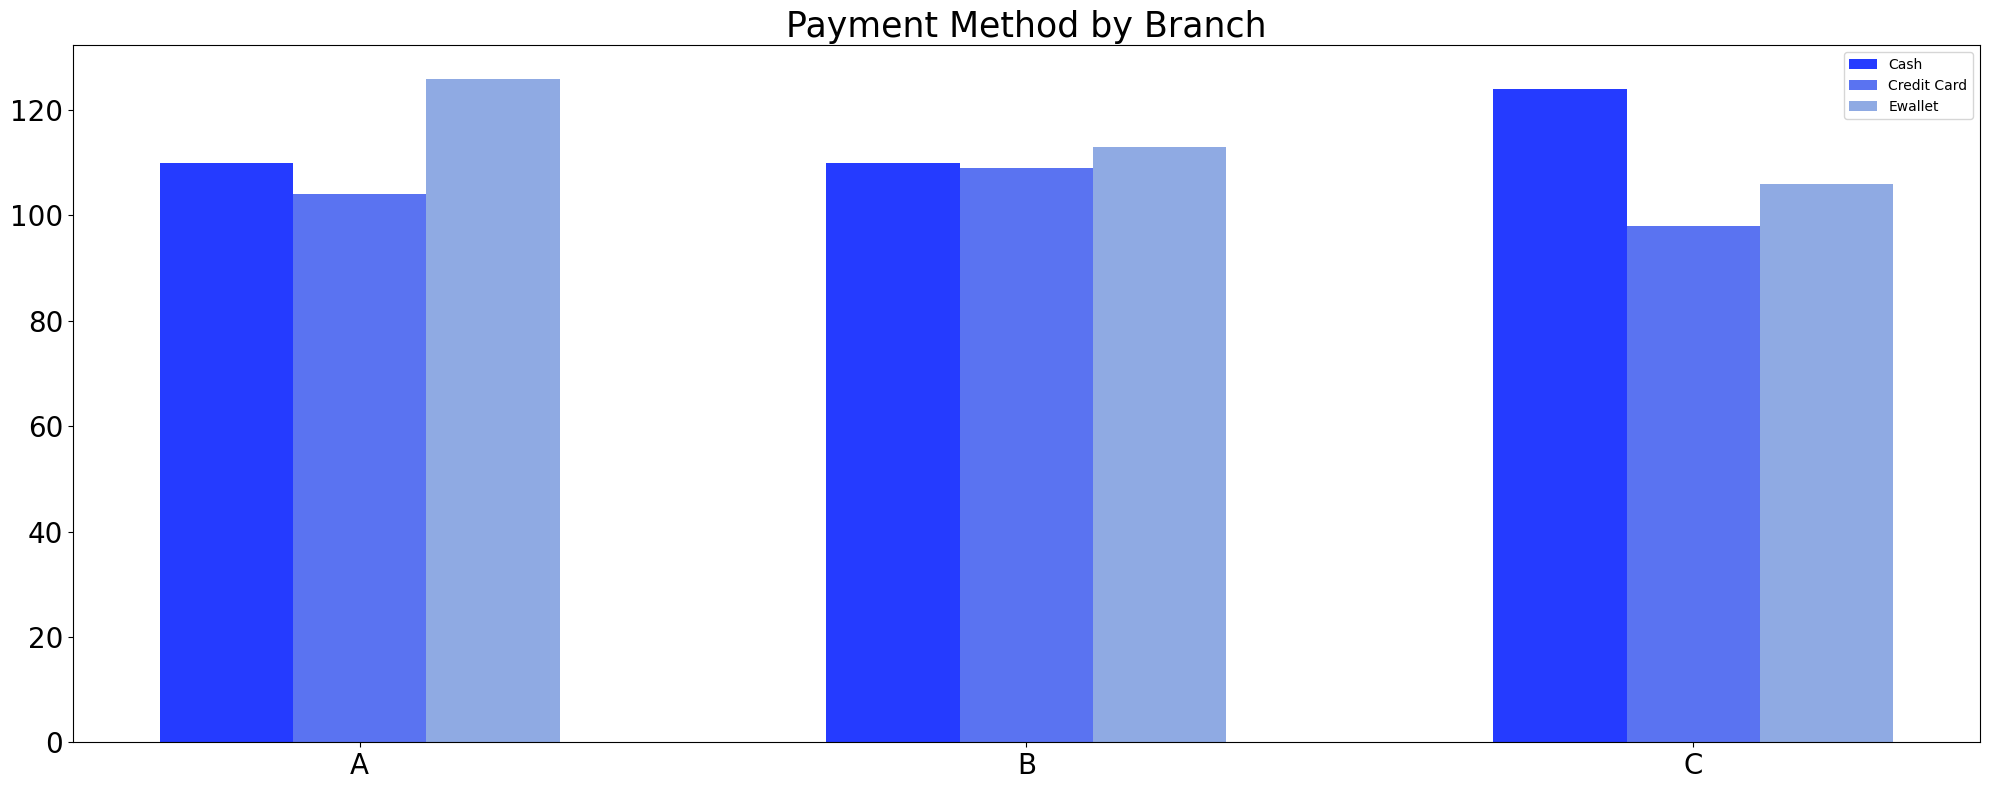

In [18]:
branch = paymentbybranch_df["Branch"]
cash = paymentbybranch_df["Cash"]
cc = paymentbybranch_df["Credit card"]
ewallet = paymentbybranch_df["Ewallet"]

bar_width = 0.2
index = np.arange(len(branch))

plt.figure(figsize=(20, 8))
plt.bar(index, cash, bar_width, label="Cash", color="#253BFF", align="center")
plt.bar(index + bar_width, cc, bar_width, label="Credit Card", color="#5A73F1", align="center")
plt.bar(index + 2 * bar_width, ewallet, bar_width, label="Ewallet", color="#8FAAE3", align="center")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Payment Method by Branch", loc="center", fontsize=25)
plt.xticks(index + bar_width, branch)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.legend()
plt.tight_layout()
plt.show()

Based on the table and data visualization results, it can be seen that in branches A and B, most customers prefer to make payments using Ewallet, but in branch C, most customers prefer to make payments using the cash method.

In [63]:
productbybranch_df = supermarketsales_df.groupby(by="Product line")["Branch"].value_counts().unstack(fill_value=0)
productbybranch_df.reset_index(inplace=True)
productbybranch_df.columns = ['Product Line', 'A', 'B', 'C' ]
productbybranch_df.head() # view product line sales by branch

,Product Line,A,B,C
0,Electronic accessories,60,55,55
1,Fashion accessories,51,62,65
2,Food and beverages,58,50,66
3,Health and beauty,47,53,52
4,Home and lifestyle,65,50,45


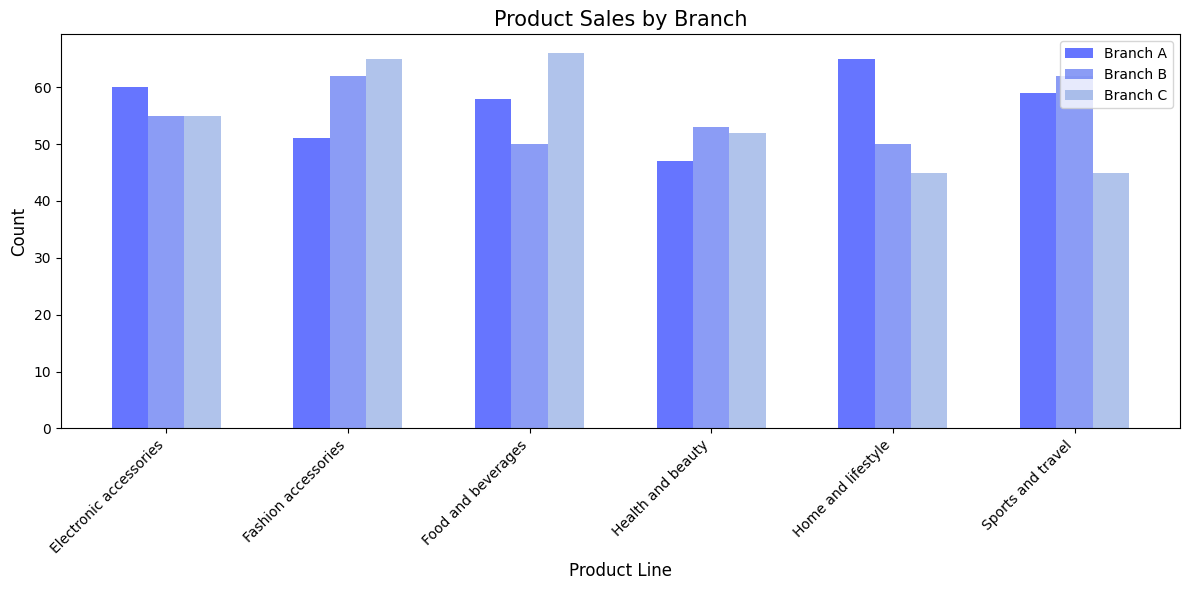

In [70]:
product_lines = productbybranch_df['Product Line']
branch_A = productbybranch_df['A']
branch_B = productbybranch_df['B']
branch_C = productbybranch_df['C']

bar_width = 0.2
x_indices = np.arange(len(product_lines))

plt.figure(figsize=(12, 6))
plt.bar(x_indices - bar_width, branch_A, width=bar_width, label='Branch A', color="#253BFF", alpha=0.7)
plt.bar(x_indices, branch_B, width=bar_width, label='Branch B', color="#5A73F1", alpha=0.7)
plt.bar(x_indices + bar_width, branch_C, width=bar_width, label='Branch C', color="#8FAAE3", alpha=0.7)

plt.xticks(x_indices, product_lines, rotation=45, ha='right')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Product Sales by Branch', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen that in branch A most consumers buy home and lifestyle, in branch B most consumers buy fashion accessories and in branch C most consumers buy food and beverages.

## EDA by Product Line

In [45]:
salesquantitybyproduct_df = supermarketsales_df.groupby(by="Product line").agg({
  "Quantity": "sum"
}).reset_index()
salesquantitybyproduct_df.head() # View sales quantity by product line

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911


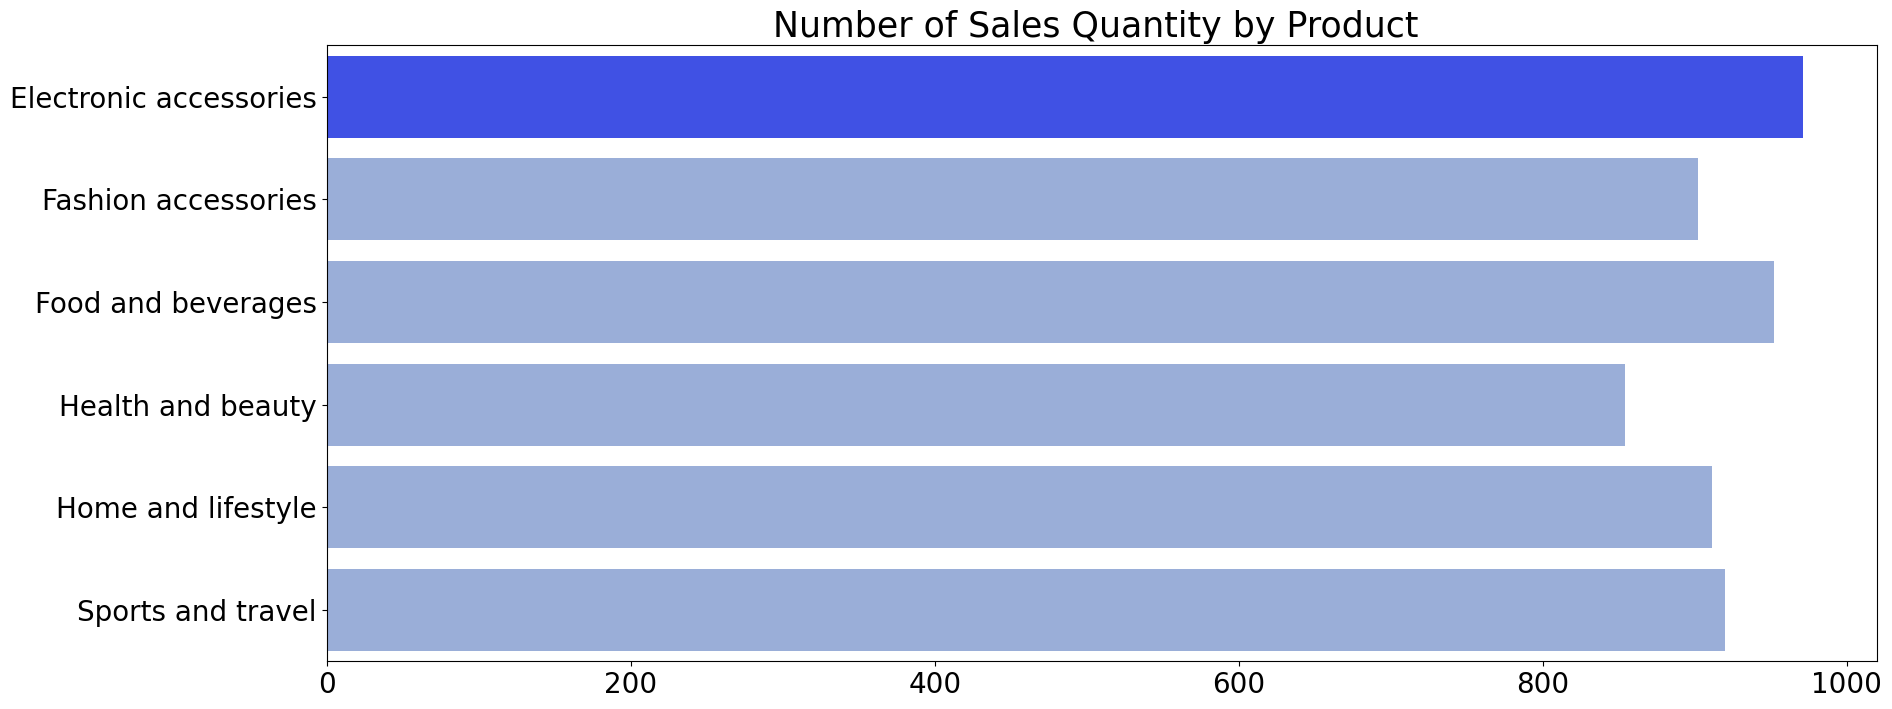

In [20]:
salesquantitybyproduct_df
plt.figure(figsize=(20, 8))
colors_ = ["#253BFF", "#8FAAE3", "#8FAAE3", "#8FAAE3", "#8FAAE3", "#8FAAE3", "#8FAAE3", "#8FAAE3"]
sns.barplot(
    x="Quantity",
    y="Product line",
    data=salesquantitybyproduct_df,
    palette=colors_
)
plt.title("Number of Sales Quantity by Product ", loc="center", fontsize=25)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()

It can be seen from the table and data visualization results that electronic accessories have the highest sales compared to other products.

In [21]:
totalpaymentbyproduct_df = supermarketsales_df.groupby(by="Product line").agg({
  "gross income": "sum"
}).reset_index()
totalpaymentbyproduct_df.head() # see the most gross revenue from the product line

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530


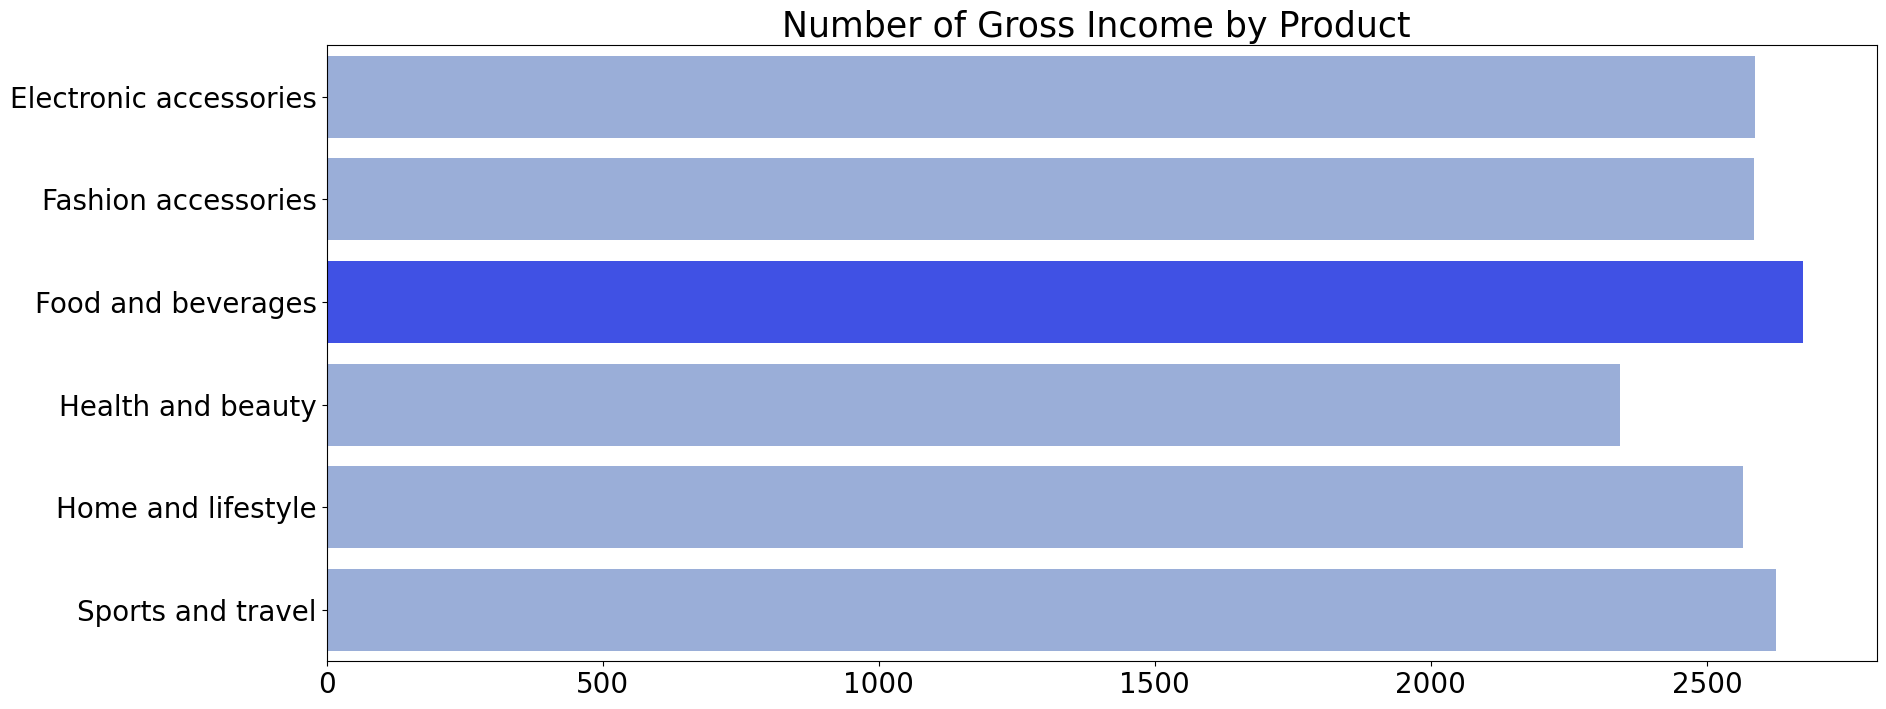

In [22]:
totalpaymentbyproduct_df
plt.figure(figsize=(20, 8))
colors_ = ["#8FAAE3", "#8FAAE3", "#253BFF", "#8FAAE3", "#8FAAE3", "#8FAAE3", "#8FAAE3"]
sns.barplot(
    x="gross income",
    y="Product line",
    data=totalpaymentbyproduct_df,
    palette=colors_
)
plt.title("Number of Gross Income by Product ", loc="center", fontsize=25)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()

seen from the table and data visualization results, although the sales quantity was obtained by electronic accessory products, the largest gross income was obtained by food and beverage products.

In [23]:
productbygender_df = supermarketsales_df.groupby(by="Product line")["Gender"].value_counts().unstack(fill_value=0)
productbygender_df.reset_index(inplace=True)
productbygender_df.columns = ['Product Line', 'Female', 'Male']
productbygender_df.head() # see customer purchasing preferences based on gender across product lines

,Product Line,Female,Male
0,Electronic accessories,84,86
1,Fashion accessories,96,82
2,Food and beverages,90,84
3,Health and beauty,64,88
4,Home and lifestyle,79,81


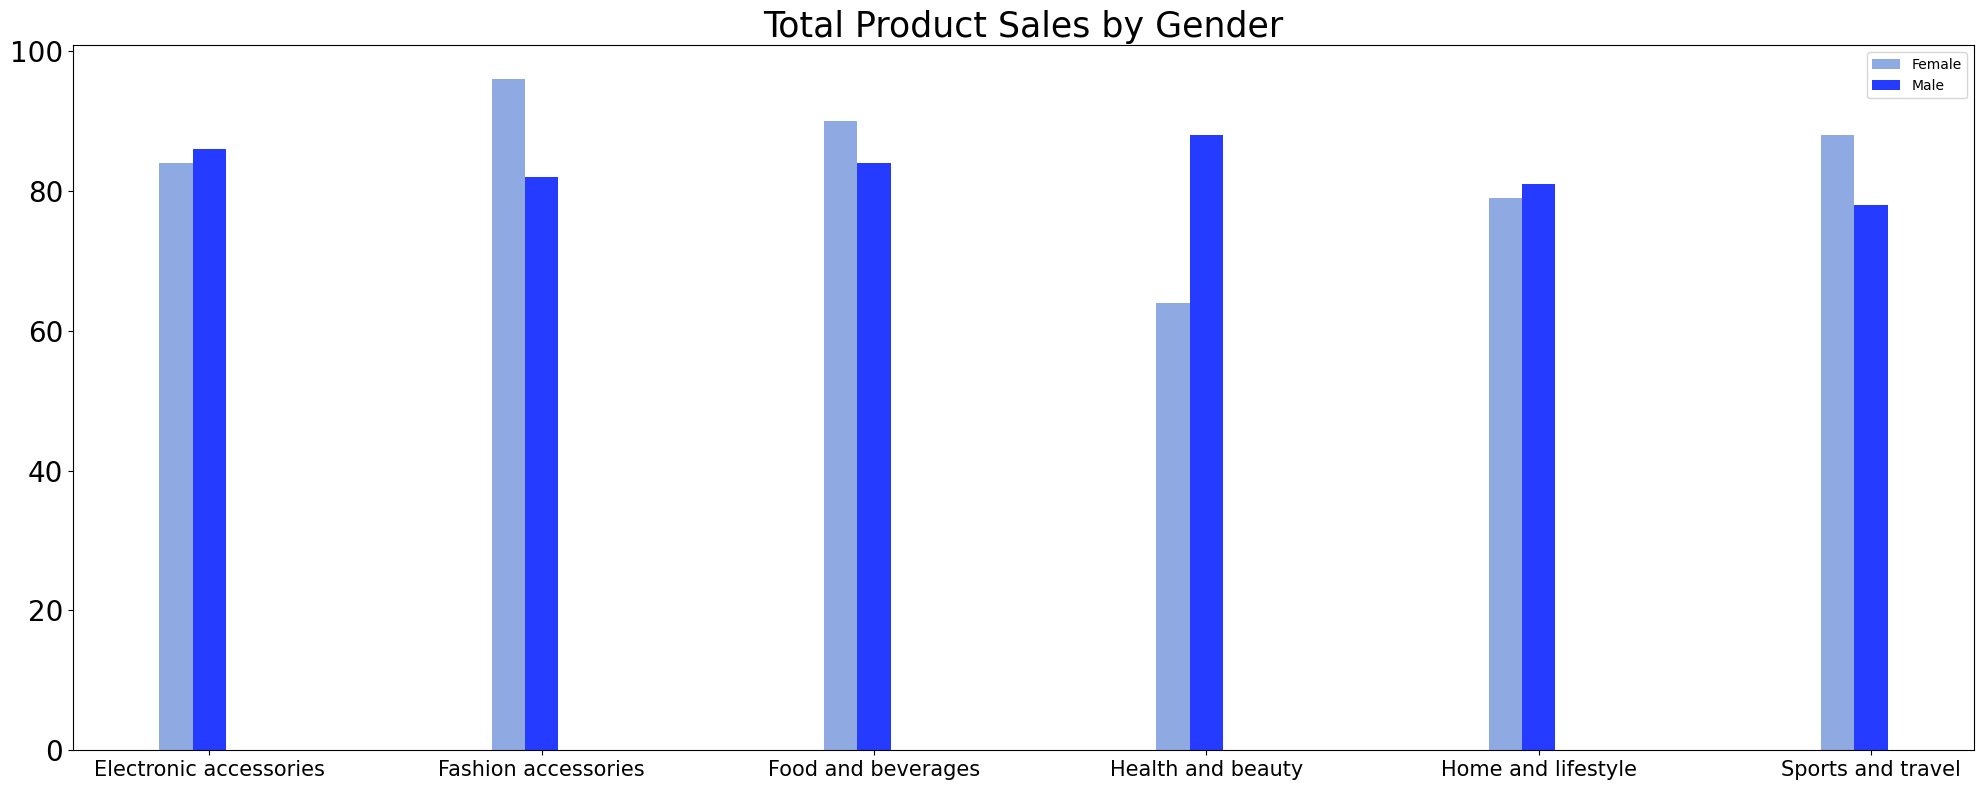

In [24]:
productline = productbygender_df["Product Line"]
female = productbygender_df["Female"]
male = productbygender_df["Male"]

bar_width = 0.1
index = np.arange(len(productline))

plt.figure(figsize=(20, 8))
plt.bar(index, female, bar_width, label="Female", color="#8FAAE3", align="center")
plt.bar(index + bar_width, male, bar_width, label="Male", color="#253BFF", align="center")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Total Product Sales by Gender", loc="center", fontsize=25)
plt.xticks(index + bar_width, productline)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.legend()
plt.tight_layout()
plt.show()

Female buyers mostly buy fashion accessories products and not many health and beauty products. while male buyers mostly buy health and beauty products and not many home and lifestyle products.

In [46]:
productbycity_df = supermarketsales_df.groupby(by="Product line")["City"].value_counts().unstack(fill_value=0)
productbycity_df.reset_index(inplace=True)
productbycity_df.columns = ['Product Line', 'Yangon', 'Naypyitaw', 'Mandalay']
productbycity_df.head() # view product line purchases by city

,Product Line,Yangon,Naypyitaw,Mandalay
0,Electronic accessories,55,55,60
1,Fashion accessories,62,65,51
2,Food and beverages,50,66,58
3,Health and beauty,53,52,47
4,Home and lifestyle,50,45,65


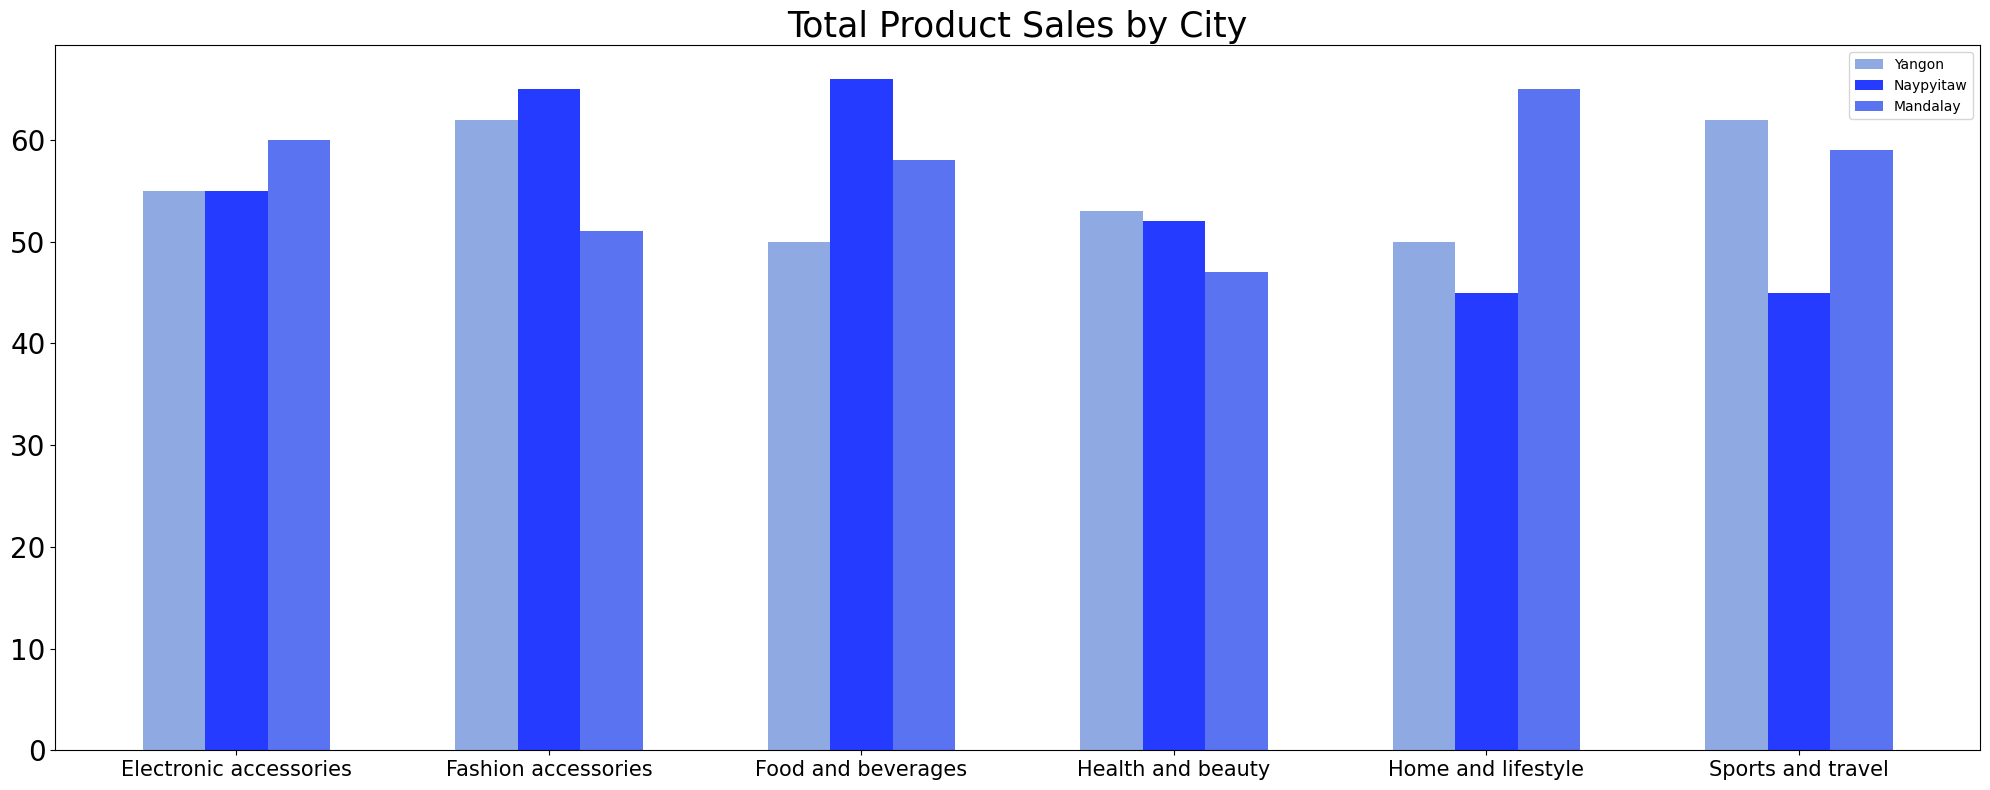

In [47]:
productline = productbycity_df["Product Line"]
yangon = productbycity_df["Yangon"]
naypyitaw = productbycity_df["Naypyitaw"]
mandalay = productbycity_df["Mandalay"]

bar_width = 0.2
index = np.arange(len(productline))

plt.figure(figsize=(20, 8))
plt.bar(index, yangon, bar_width, label="Yangon", color="#8FAAE3", align="center")
plt.bar(index + bar_width, naypyitaw, bar_width, label="Naypyitaw", color="#253BFF", align="center")
plt.bar(index + 2 * bar_width, mandalay, bar_width, label="Mandalay", color="#5A73F1", align="center")

plt.xlabel(None)
plt.ylabel(None)
plt.title("Total Product Sales by City", loc="center", fontsize=25)
plt.xticks(index + bar_width, productline)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.legend()
plt.tight_layout()
plt.show()

in Yangon city most customers buy fashion accessories products, while in Naypyitaw city most customers buy food and beverage products and in Mandalay city most customers buy home and lifestyle products.

## EDA Other

In [50]:
monthlyorders_df = supermarketsales_df.resample(rule='D', on='Date').agg({
    "Invoice ID": "nunique",
    "Total": "sum"
})
monthlyorders_df.index = monthlyorders_df.index.strftime('%m-%d')
monthlyorders_df = monthlyorders_df.reset_index()
monthlyorders_df.rename(columns={
    "Invoice ID": "order_count",
    "Total": "revenue"
}, inplace=True)
monthlyorders_df.head() # view multiple purchases and also revenue by month

,Date,order_count,revenue
0,01-01,12,4745.1810
1,01-02,8,1945.5030
2,01-03,8,2078.1285
3,01-04,6,1623.6885
4,01-05,12,3536.6835


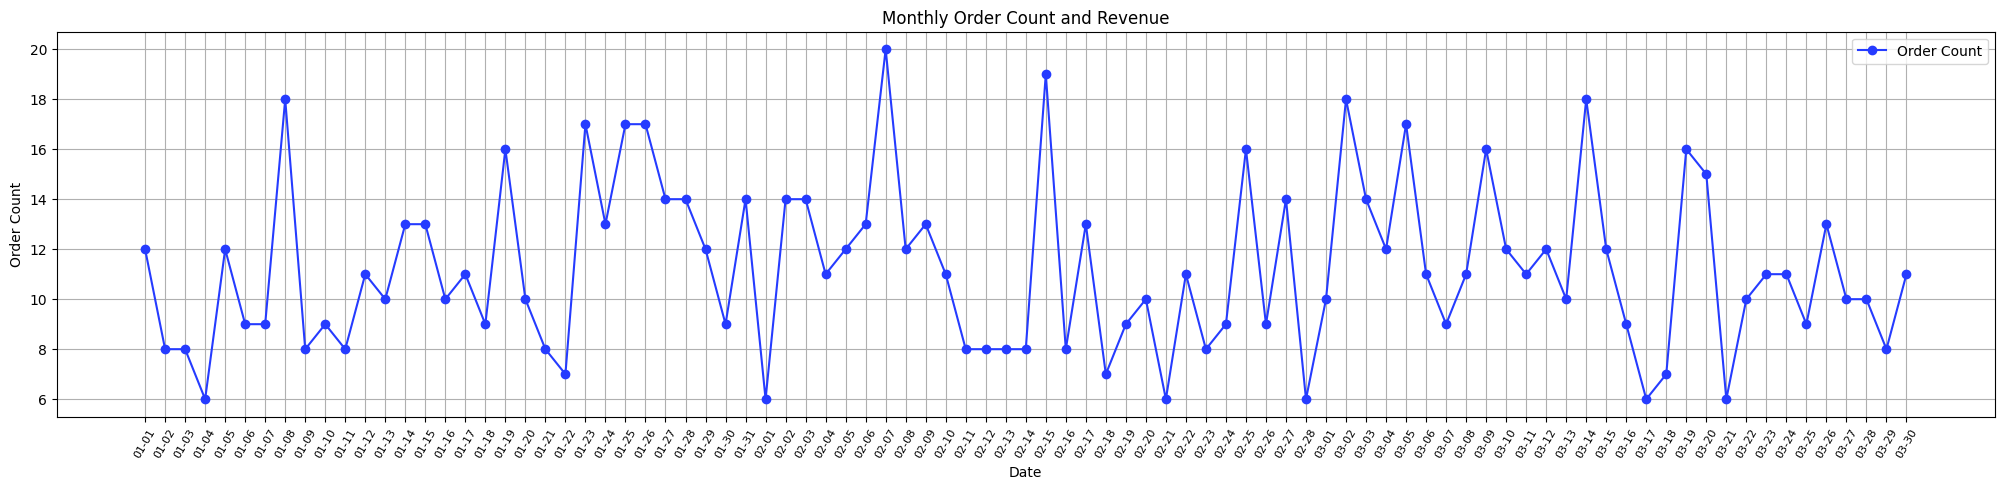

In [28]:
plt.figure(figsize=(25, 5))
plt.plot(monthlyorders_df['Date'], monthlyorders_df['order_count'], label='Order Count', marker='o', color="#253BFF")
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.title('Monthly Order Count and Revenue')
plt.tick_params(axis='x', labelsize=8, rotation=60)
plt.legend()
plt.grid(True)

plt.show()

The most purchases occurred on 2019-02-07 with a total of 20 purchases, while there were 6 dates indicating the fewest purchases with only 6 purchases.

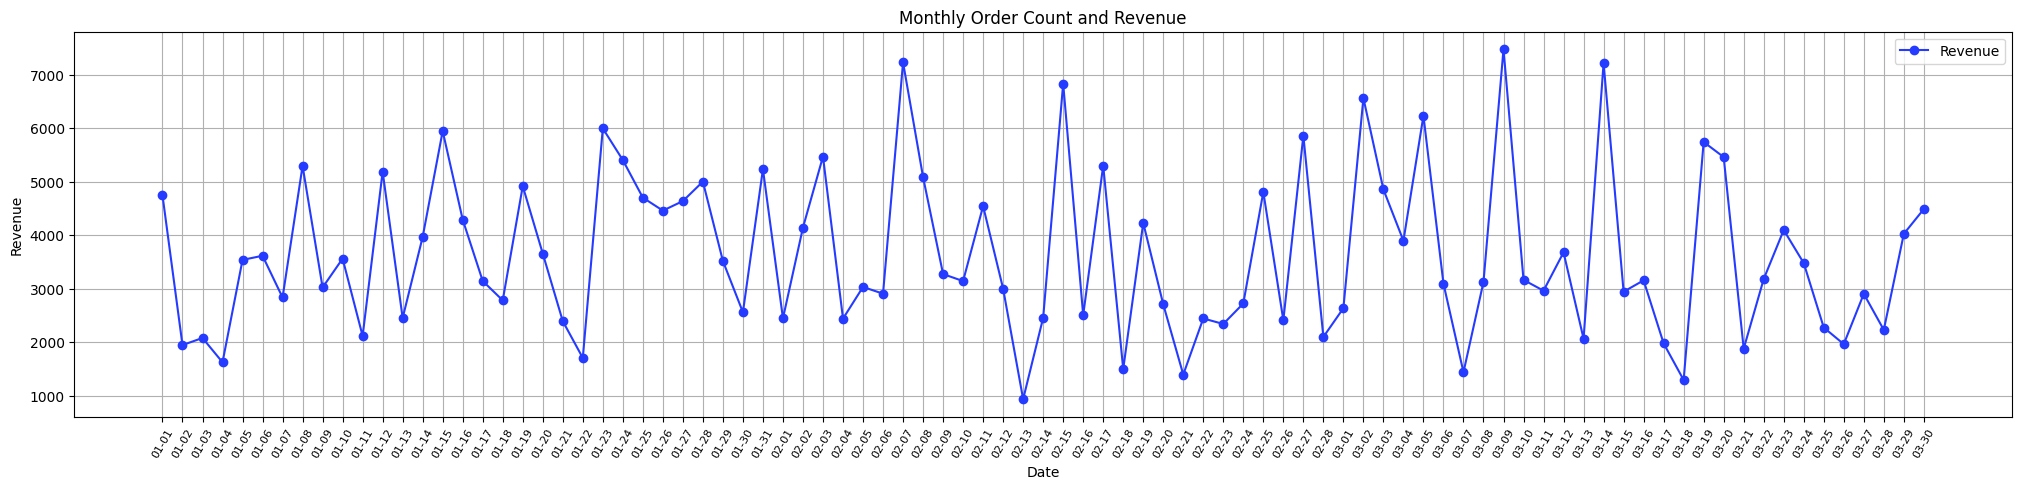

In [29]:
plt.figure(figsize=(25, 5))
plt.plot(monthlyorders_df['Date'], monthlyorders_df['revenue'], label='Revenue', marker='o', color="#253BFF")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Order Count and Revenue')
plt.tick_params(axis='x', labelsize=8, rotation=60)
plt.legend()
plt.grid(True)

plt.show()

The highest income occurred on 2019-03-09 with total income of 7474,0470 while the lowest income occurred on 2019-02-13 with total income of only 934,2375.

In [30]:
sellbygender_df = supermarketsales_df.groupby(by="Gender").agg({
  "Gender": "count"
}).rename(columns={"Gender": "Gender Count"}).reset_index()
sellbygender_df.head() # view total purchases by gender

,Gender,Gender Count
0,Female,501
1,Male,499


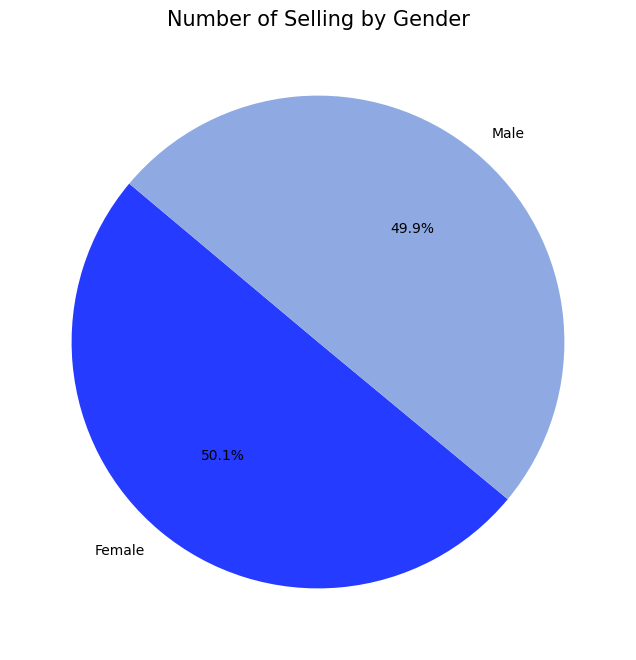

In [32]:
gender_counts = sellbygender_df.groupby('Gender')['Gender Count'].sum()
colors = ['#253BFF', '#8FAAE3']

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Selling by Gender', fontsize=15)
plt.show()

There are more female buyers than male buyers.

In [34]:
salesbycity_df = supermarketsales_df.groupby(by="City").agg({
  "City": "count"
}).rename(columns={"City": "City Count"}).reset_index()
salesbycity_df.head() # view total purchases by city

,City,City Count
0,Mandalay,332
1,Naypyitaw,328
2,Yangon,340


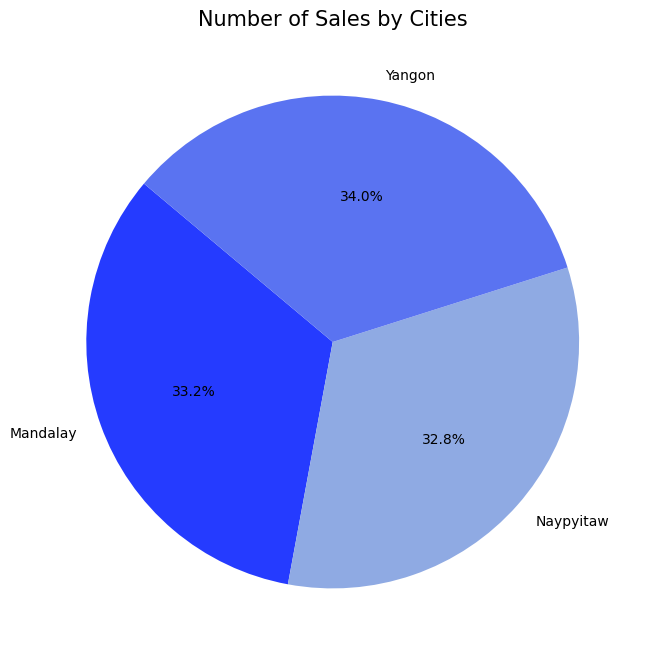

In [40]:
city_counts = salesbycity_df.groupby('City')['City Count'].sum()
colors = ['#253BFF', '#8FAAE3', "#5A73F1"]

plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Sales by Cities', fontsize=15)
plt.show()

the most purchases occurred in Yangon city and the least purchases occurred in Naypyitaw city.

In [36]:
paymentmethod_df = supermarketsales_df.groupby(by="Payment").agg({
  "Payment": "count"
}).rename(columns={"Payment": "Payment Count"}).reset_index()
paymentmethod_df.head() # view consumer payment method preferences

,Payment,Payment Count
0,Cash,344
1,Credit card,311
2,Ewallet,345


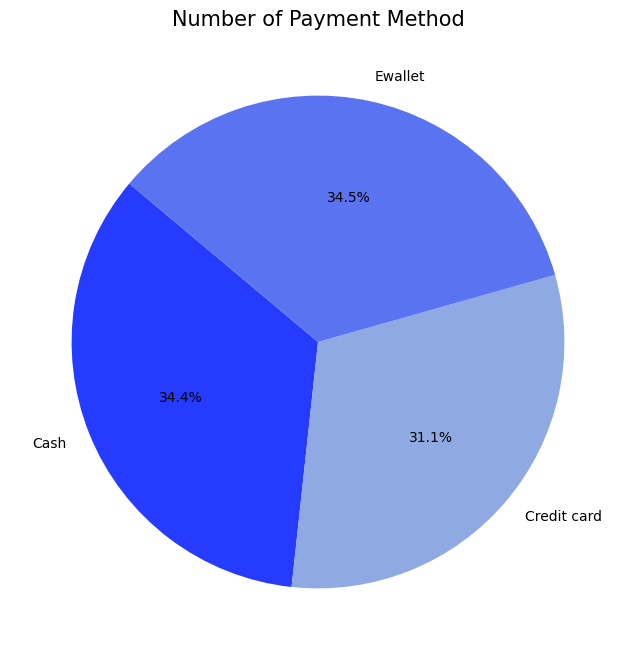

In [39]:
payment_counts = paymentmethod_df.groupby('Payment')['Payment Count'].sum()
colors = ['#253BFF', '#8FAAE3', "#5A73F1"]

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Payment Method', fontsize=15)
plt.show()

Most consumers make purchases using e-wallets and the least use credit cards.